In [3]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv" , parse_dates=['Tarih'])
data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [3]:
future_data = pd.read_csv("future.csv", parse_dates=['Tarih']).drop('Unnamed: 0' , axis = 1)
future_data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,NaN
1,2022-08-01 01:00:00,NaN
2,2022-08-01 02:00:00,NaN
3,2022-08-01 03:00:00,NaN
4,2022-08-01 04:00:00,NaN


In [4]:
med = pd.read_csv("med.csv" , parse_dates=['Tarih'])
med.head()

,Tarih
0,2019-12-23
1,2019-06-12
2,2019-01-25
3,2019-09-25
4,2019-03-29


In [5]:
test_data = data.loc[data.Tarih > '2022-03-23 23:00:00'].copy()
train_data = data.loc[data.Tarih <= '2022-03-23 23:00:00'].copy()

In [6]:
# X_val = X_train[-96:]
# X_train = X_train[:-96]

all_data = [train_data , test_data , future_data , data]

In [7]:
from feat_engs import create_datetimes, create_businessDay_cumulativeholidays ,create_electricOutage_timeofDay , create_holiday_weekend , create_hourly_sin_cos , create_outage_rolling_percentages , create_seasons

for df in all_data :
    create_datetimes(df)
    # create_holiday_weekend(df)
    # create_businessDay_cumulativeholidays(df)
    create_electricOutage_timeofDay(df , med)
    # # create_hourly_sin_cos(df)
    # # create_outage_rolling_percentages(df)
    # create_seasons(df)
    df.set_index('Tarih' , inplace=True)
    df.drop('date' , axis = 1 ,inplace=True)

In [8]:
train_data

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,electrical_outage,timeofday
Tarih,,,,,,,,,,,
2018-01-01 00:00:00,1593.944216,0,0,1,1,2018,1,1,1,0,3
2018-01-01 01:00:00,1513.933887,1,0,1,1,2018,1,1,1,0,3
2018-01-01 02:00:00,1402.612637,2,0,1,1,2018,1,1,1,0,3
2018-01-01 03:00:00,1278.527266,3,0,1,1,2018,1,1,1,0,3
2018-01-01 04:00:00,1220.697701,4,0,1,1,2018,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23 19:00:00,2367.859579,19,2,1,3,2022,82,23,12,0,3
2022-03-23 20:00:00,2408.812850,20,2,1,3,2022,82,23,12,0,3
2022-03-23 21:00:00,2287.339196,21,2,1,3,2022,82,23,12,0,3


In [ ]:
# from astral.sun import sun
# from astral import LocationInfo
# import pytz

# location_izmir = LocationInfo("Izmir", "Turkey")
# location_izmir.latitude = 38.419200
# location_izmir.longitude = 27.128700
# location_izmir.timezone = pytz.timezone("Turkey")

# location_manisa = LocationInfo("Manisa", "Turkey")
# location_manisa.latitude = 38.612000
# location_manisa.longitude = 27.426000
# location_manisa.timezone = pytz.timezone("Turkey")

# def daylight_hours_izmir(date):
#     s = sun(location_izmir.observer, date=date)
#     daylight_duration = (s['sunset'] - s['sunrise']).seconds / 3600
#     return daylight_duration

# def daylight_hours_manisa(date):
#     s = sun(location_manisa.observer, date=date)
#     daylight_duration = (s['sunset'] - s['sunrise']).seconds / 3600
#     return daylight_duration

# for dataset in all_data :
#     dataset['Daylight_hours_Izmir'] = dataset['Tarih'].apply(daylight_hours_izmir)
#     dataset['Daylight_hours_Manisa'] = dataset['Tarih'].apply(daylight_hours_manisa)
#     dataset


In [9]:
y_all = data['Dağıtılan Enerji (MWh)']
X_all = data.copy()

y_test = test_data['Dağıtılan Enerji (MWh)']
X_test = test_data.copy()

In [10]:
X_all

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,electrical_outage,timeofday
Tarih,,,,,,,,,,,
2018-01-01 00:00:00,1593.944216,0,0,1,1,2018,1,1,1,0,3
2018-01-01 01:00:00,1513.933887,1,0,1,1,2018,1,1,1,0,3
2018-01-01 02:00:00,1402.612637,2,0,1,1,2018,1,1,1,0,3
2018-01-01 03:00:00,1278.527266,3,0,1,1,2018,1,1,1,0,3
2018-01-01 04:00:00,1220.697701,4,0,1,1,2018,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 19:00:00,2492.489498,19,6,3,7,2022,212,31,30,0,3
2022-07-31 20:00:00,2479.958245,20,6,3,7,2022,212,31,30,0,3
2022-07-31 21:00:00,2485.016884,21,6,3,7,2022,212,31,30,0,3


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

base_model = CatBoostRegressor(task_type="GPU", verbose=False , bootstrap_type='Poisson')

params = {
    'iterations': np.arange(1000, 3000, 50),
    'learning_rate': np.logspace(-4, 0, 40),
    'depth': range(2, 15),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bylevel': np.arange(0.1, 1.1, 0.1),
    'l2_leaf_reg': np.arange(0, 10),
    }

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
random_search = RandomizedSearchCV(base_model, param_distributions=params, n_iter=100, cv=3, scoring=mape_scorer, random_state=53)
random_search.fit(X_all, y_all)

print(f"""
      En iyi CatBoost parametreleri : {random_search.best_params_}
      En iyi mape skorumuz : {-random_search.best_score_}
      """)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

base_model = CatBoostRegressor(verbose=False, bootstrap_type='MVS')

params = {
    'iterations': np.arange(1000, 3000, 50),
    'learning_rate': np.logspace(-4, 0, 40),
    'depth': range(2, 15),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bylevel': np.arange(0.1, 1.1, 0.1),
    'l2_leaf_reg': np.arange(0, 10),
}

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
random_search = RandomizedSearchCV(base_model, param_distributions=params, n_iter=40, cv=3, scoring=mape_scorer, random_state=53)
random_search.fit(X_all, y_all)

print(f"""
      En iyi CatBoost parametreleri : {random_search.best_params_}
      En iyi mape skorumuz : {-random_search.best_score_}
      """)


In [12]:
model = CatBoostRegressor(iterations=2700, subsample=0.2, learning_rate=0.1, depth=8, l2_leaf_reg= 6,colsample_bylevel= 1, loss_function='MAPE', bootstrap_type='MVS')
# model = CatBoostRegressor(iterations=1800, subsample=0.4, learning_rate=0.075, depth=16, l2_leaf_reg= 4,colsample_bylevel= 1, loss_function='MAPE', bootstrap_type='MVS')

In [13]:
model.fit(X_all,y_all , verbose= False)

In [14]:
y_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test , y_pred)

0.002983690922939754

In [15]:
X_all = X_all.reset_index(drop=True)

# Future Predictions

In [16]:
last_window = X_all[-24:]
last_window

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,electrical_outage,timeofday
40128,2193.865486,0,6,3,7,2022,212,31,30,0,3
40129,2054.943313,1,6,3,7,2022,212,31,30,0,3
40130,1928.728870,2,6,3,7,2022,212,31,30,0,3
40131,1848.355637,3,6,3,7,2022,212,31,30,0,3
40132,1788.783848,4,6,3,7,2022,212,31,30,0,3
40133,1759.561690,5,6,3,7,2022,212,31,30,0,3
40134,1658.934897,6,6,3,7,2022,212,31,30,0,1
40135,1688.072148,7,6,3,7,2022,212,31,30,0,1
40136,1795.943744,8,6,3,7,2022,212,31,30,0,1
40137,1940.204176,9,6,3,7,2022,212,31,30,0,1


In [17]:
last_window.shape

(24, 11)

In [18]:
# Son 24 saatlik verileri alın
# last_window = data_last_seq.copy().reset_index(drop=True)

# 31 gün boyunca tahminler yapmak için bir boş tahmin dizisi oluşturun
predictions = []

for i in range(31*24):
    # print((last_window).values)
    # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
    last_window_reshaped = np.array(last_window).reshape(24, 11)

    # Son pencereyi kullanarak bir tahmin yapın
    prediction = model.predict(last_window_reshaped)[0]

    # Tahmini tahmin listesine ekleyin
    predictions.append(prediction)

    # Tahmin edilen değeri son pencerenin sonuna ekleyin ve pencereyi 1 saat kaydırın
    last_window = pd.concat([last_window.iloc[1:], future_data.iloc[[i]]], axis=0)
    last_window.loc[last_window.index[-1] , 'Dağıtılan Enerji (MWh)' ] = prediction

# Tahminleri burada kullanabilirsiniz

In [19]:
predictions

[2188.629359425042,
 2049.738900651032,
 1925.8495977372218,
 1842.15340485468,
 1788.7415483192888,
 1764.8753134137316,
 1658.4603012703444,
 1690.7638326095944,
 1792.2367343662227,
 1942.813592106633,
 2120.741472194728,
 2249.3124106030596,
 2305.883577385076,
 2378.81965507759,
 2456.5386599237395,
 2487.623688421205,
 2499.9315654998477,
 2501.0815326391835,
 2551.392286243554,
 2483.360651496312,
 2482.441131169009,
 2483.697903558681,
 2396.3214341290977,
 2285.027809529892,
 2192.300755264397,
 2047.6039216806744,
 1929.6306893671374,
 1844.5587075566636,
 1802.615349977539,
 1767.5503560309728,
 1654.8993867148663,
 1687.0335973678718,
 1814.240562436256,
 1972.7577404397518,
 2144.7820317917485,
 2274.158245216349,
 2323.026419818665,
 2383.5710269226533,
 2514.1845619805977,
 2527.651245779062,
 2527.651245779062,
 2527.829396614742,
 2583.7612347974764,
 2500.7052428861334,
 2500.7517888313296,
 2496.580764646156,
 2406.8175453973276,
 2292.1978663231757,
 2192.1837104412

In [20]:
predictions[:30]

[2188.629359425042,
 2049.738900651032,
 1925.8495977372218,
 1842.15340485468,
 1788.7415483192888,
 1764.8753134137316,
 1658.4603012703444,
 1690.7638326095944,
 1792.2367343662227,
 1942.813592106633,
 2120.741472194728,
 2249.3124106030596,
 2305.883577385076,
 2378.81965507759,
 2456.5386599237395,
 2487.623688421205,
 2499.9315654998477,
 2501.0815326391835,
 2551.392286243554,
 2483.360651496312,
 2482.441131169009,
 2483.697903558681,
 2396.3214341290977,
 2285.027809529892,
 2192.300755264397,
 2047.6039216806744,
 1929.6306893671374,
 1844.5587075566636,
 1802.615349977539,
 1767.5503560309728]

In [21]:
from eval_metrics import preds_plot

In [22]:
target_data = data[data.index.month == 8]

In [23]:
target_data_2018 = target_data[target_data.index.year == 2018]
target_data_2019 = target_data[target_data.index.year == 2019]
target_data_2020 = target_data[target_data.index.year == 2020]
target_data_2021 = target_data[target_data.index.year == 2021]

In [24]:
target_data = target_data[['Dağıtılan Enerji (MWh)']]
target_data

,Dağıtılan Enerji (MWh)
Tarih,
2018-08-01 00:00:00,2106.796778
2018-08-01 01:00:00,1936.871633
2018-08-01 02:00:00,1808.523094
2018-08-01 03:00:00,1725.237068
2018-08-01 04:00:00,1680.685169
...,...
2021-08-31 19:00:00,2538.809761
2021-08-31 20:00:00,2572.939106
2021-08-31 21:00:00,2484.682803


In [25]:
future_data['Dağıtılan Enerji (MWh)'] = predictions
future_data = future_data['Dağıtılan Enerji (MWh)']
future_data

Tarih
2022-08-01 00:00:00    2188.629359
2022-08-01 01:00:00    2049.738901
2022-08-01 02:00:00    1925.849598
2022-08-01 03:00:00    1842.153405
2022-08-01 04:00:00    1788.741548
                          ...     
2022-08-31 19:00:00    2409.526047
2022-08-31 20:00:00    2409.578016
2022-08-31 21:00:00    2405.449266
2022-08-31 22:00:00    2244.383948
2022-08-31 23:00:00    2170.406644
Name: Dağıtılan Enerji (MWh), Length: 744, dtype: float64

In [26]:
data = data['Dağıtılan Enerji (MWh)']
data

Tarih
2018-01-01 00:00:00    1593.944216
2018-01-01 01:00:00    1513.933887
2018-01-01 02:00:00    1402.612637
2018-01-01 03:00:00    1278.527266
2018-01-01 04:00:00    1220.697701
                          ...     
2022-07-31 19:00:00    2492.489498
2022-07-31 20:00:00    2479.958245
2022-07-31 21:00:00    2485.016884
2022-07-31 22:00:00    2396.574255
2022-07-31 23:00:00    2285.252844
Name: Dağıtılan Enerji (MWh), Length: 40152, dtype: float64

In [27]:
target_data.mean()

Dağıtılan Enerji (MWh)    2209.590267
dtype: float64

In [28]:
future_data.values.mean()

2190.198879550657

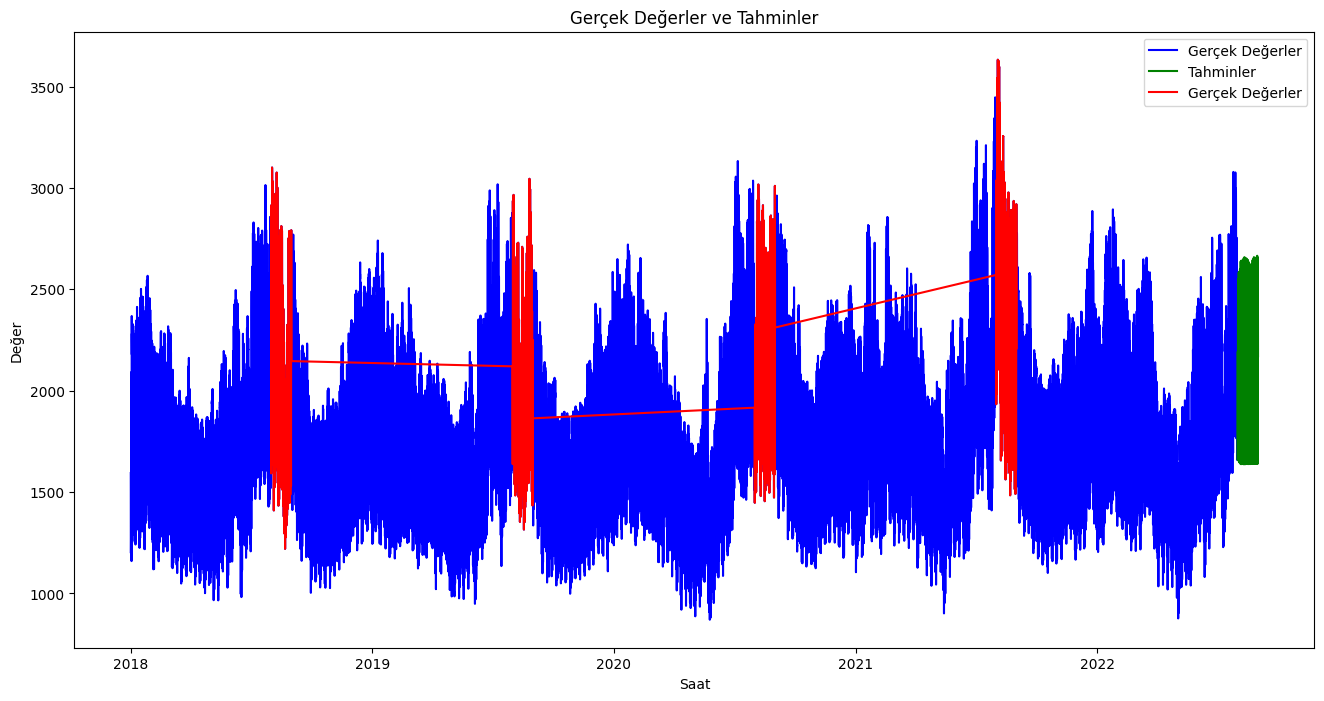

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
preds_plot(data , future_data , target_data )

In [38]:
# future_data[(future_data.index > '2022-08-01 00:00:00') & (future_data.index < '2022-08-15 00:00:00')].values += 

sub = future_data.reset_index(drop=False)
sub

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2188.629359
1,2022-08-01 01:00:00,2049.738901
2,2022-08-01 02:00:00,1925.849598
3,2022-08-01 03:00:00,1842.153405
4,2022-08-01 04:00:00,1788.741548
...,...,...
739,2022-08-31 19:00:00,2409.526047
740,2022-08-31 20:00:00,2409.578016
741,2022-08-31 21:00:00,2405.449266
742,2022-08-31 22:00:00,2244.383948


In [39]:
model.save_model('catboost1.h5')
sub.to_csv('catboost1.csv')

In [47]:
sub = pd.read_csv('catboost1.csv').drop('Unnamed: 0' , axis = 1)
sub['Tarih'] = sub['Tarih'].astype('datetime64')


,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2188.629359
1,2022-08-01 01:00:00,2049.738901
2,2022-08-01 02:00:00,1925.849598
3,2022-08-01 03:00:00,1842.153405
4,2022-08-01 04:00:00,1788.741548
...,...,...
739,2022-08-31 19:00:00,2409.526047
740,2022-08-31 20:00:00,2409.578016
741,2022-08-31 21:00:00,2405.449266
742,2022-08-31 22:00:00,2244.383948


In [53]:
sub.columns

Index(['Tarih', 'Dağıtılan Enerji (MWh)'], dtype='object')

In [56]:
future_data = pd.read_csv('future.csv').drop('Unnamed: 0' , axis  = 1)
future_data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,NaN
1,2022-08-01 01:00:00,NaN
2,2022-08-01 02:00:00,NaN
3,2022-08-01 03:00:00,NaN
4,2022-08-01 04:00:00,NaN


In [57]:
future_data['Dağıtılan Enerji (MWh)'] = predictions
future_data

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2188.629359
1,2022-08-01 01:00:00,2049.738901
2,2022-08-01 02:00:00,1925.849598
3,2022-08-01 03:00:00,1842.153405
4,2022-08-01 04:00:00,1788.741548
...,...,...
739,2022-08-31 19:00:00,2409.526047
740,2022-08-31 20:00:00,2409.578016
741,2022-08-31 21:00:00,2405.449266
742,2022-08-31 22:00:00,2244.383948


In [ ]:
future_data.to_csv('catboost1.csv' , index=False)

In [5]:
virgüllü_df = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Denenecekler\catboost-2200-lr063-dep6-leaf7-colsamp0.53-bootstrapMVS,.csv').drop('Unnamed: 0' , axis = 1)
virgüllü_df

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2251.462456
1,2022-08-01 01:00:00,2012.094467
2,2022-08-01 02:00:00,1939.207633
3,2022-08-01 03:00:00,1852.243374
4,2022-08-01 04:00:00,1797.405800
...,...,...
739,2022-08-31 19:00:00,2446.775151
740,2022-08-31 20:00:00,2442.116127
741,2022-08-31 21:00:00,2466.626670
742,2022-08-31 22:00:00,2347.530730


In [ ]:
virgüllü_df.to_csv('catboost-2200-lr063-dep6-leaf7-colsamp0.53-bootstrapMVS.csv' , index=None)

In [ ]:
# # Son pencereyi kullanarak bir tahmin yapın
# prediction = model.predict(last_window_reshaped)[0]

# # Tahmini tahmin listesine ekleyin
# predictions.append(prediction)

# # Tahmin edilen değeri future_data'nın 'Dağıtılan Enerji (MWh)' sütununa ekleyin 
# future_data.loc[i, 'Dağıtılan Enerji (MWh)'] = prediction

# # Son pencereyi güncelleyin ve ilk satırı çıkarıp, future_data'nın ilk satırını ekleyin
# last_window = last_window[1:]
# last_window.loc[len(last_window)] = future_data.loc[i]

In [ ]:
# X_future = np.arange(len(X_test), len(X_test)+744, 1).reshape(-1, 1)
# y_future = model.predict(X_future)

In [ ]:
# # Elimizdeki verilerin son 24'ü bir sonraki tahmini yapmak için kullanılacak
# last_window = data_last_seq.copy()

# # 31 gün boyunca tahminler yapmak için bir boş tahmin dizisi oluşturun
# predictions = []

# for i in range(31*24):
#     # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
#     last_window_reshaped = last_window.reshape(1, 24, 1)

#     # Son pencereyi kullanarak bir tahmin yapın
#     prediction = model.predict(last_window_reshaped , verbose = 0)[0][0]

#     # Tahmini tahmin listesine ekleyin
#     predictions.append(prediction)

#     # Tahmin edilen değeri son pencerenin sonuna ekleyin
#     last_window = np.append(last_window[1:], prediction)
    
# # Tahminleri geri ölçeklendirin
# # predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# # Tahminlerinizi burada kullanabilirsiniz